# Python Code for the Applied Data Science Capstone - Car Accident Severity Prediction

### 1.1 Importing Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
#import folium
#from folium import features

### 1.2 Data Collection (Extraction) and Understanding

In [49]:
# Original data is downloaded from Seattle’s government site (link provided below).
# O_data=pd.read_csv("http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv?outSR=%7B%22latestWkid%22:2926,%22wkid%22:2926%7D")
# O_data=pd.read_csv('Collisions Data_Sept 22 Update.csv')
O_data=pd.read_csv('Collisions Data_Sept 22 Update.csv', low_memory=False)

In [50]:
# Checking the first 5 rows of the dataset
O_data.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1.268354e+06,265256.609668,1,1003,1003,3503158,Matched,Block,NaN,AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,...,Dry,Daylight,Y,NaN,NaN,45,Vehicle - Pedalcyclist,15057,0,N
1,1.259316e+06,202173.388163,2,56200,56200,1795087,Matched,Block,NaN,35TH AVE SW BETWEEN SW MORGAN ST AND SW HOLLY ST,...,Dry,Dark - Street Lights On,NaN,6015003.0,NaN,0,Vehicle going straight hits pedestrian,0,0,N
2,1.264342e+06,259613.000382,3,327037,328537,E979380,Matched,Intersection,37122.0,3RD AVE NW AND NW 100TH ST,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
3,1.279221e+06,222017.872023,4,327278,328778,E996362,Unmatched,Intersection,30602.0,M L KING JR WAY S AND S JACKSON ST,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N
4,1.262205e+06,242179.124204,5,1248,1248,3645424,Unmatched,Block,NaN,W EWING ST BETWEEN 6TH AVE W AND W EWING PL,...,NaN,NaN,NaN,NaN,NaN,,NaN,0,0,N


In [51]:
# Checking the shape of data
O_data.shape

(221525, 40)

In [52]:
# Checking the columns/variables that are present in the dataset
O_data.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [53]:
# Checking statistical data of the dataset
O_data.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,2.140500e+05,214050.000000,221525.000000,221525.000000,221525.000000,71936.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221525.000000,221524.000000,1.272050e+05,221525.000000,2.215250e+05
mean,1.271147e+06,229822.714977,110763.000000,144824.873233,145053.886627,37626.275537,2.226941,0.038118,0.027360,1.730482,0.373935,0.015208,0.001693,13.383042,7.971063e+06,261.135903,9.577244e+03
std,7.361903e+03,20463.229585,63948.903529,89222.567072,89598.173976,51968.207339,1.470050,0.201766,0.164537,0.829754,0.732077,0.158052,0.044888,7.300182,2.611523e+06,3246.962907,7.146156e+04
min,1.249026e+06,184059.089009,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.266677e+06,214145.383695,55382.000000,71668.000000,71668.000000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,1.271142e+06,228336.487966,110763.000000,127252.000000,127252.000000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,1.276029e+06,245908.853680,166144.000000,209935.000000,210155.000000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,1.293052e+06,271525.414794,221525.000000,334020.000000,335520.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [54]:
# Cheking the data type of the variables
O_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   OBJECTID         221525 non-null  int64  
 3   INCKEY           221525 non-null  int64  
 4   COLDETKEY        221525 non-null  int64  
 5   REPORTNO         221525 non-null  object 
 6   STATUS           221525 non-null  object 
 7   ADDRTYPE         217813 non-null  object 
 8   INTKEY           71936 non-null   float64
 9   LOCATION         216935 non-null  object 
 10  EXCEPTRSNCODE    101122 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221524 non-null  object 
 13  SEVERITYDESC     221525 non-null  object 
 14  COLLISIONTYPE    195212 non-null  object 
 15  PERSONCOUNT      221525 non-null  int64  
 16  PEDCOUNT         221525 non-null  int6

In [55]:
# Feature Extraction - Determining the attiributes that will be used for the study - only relevant variables will be selected
data = O_data[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','FATALITIES','INCDTTM',
               'JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','HITPARKEDCAR']]

In [56]:
# Data Visualization
# Checking whether there is any relationship between the occurence of accidents and time/days/months/years.
data['INCDTTM'] = pd.to_datetime(data['INCDTTM'])
years = pd.DatetimeIndex(data['INCDTTM']).year.value_counts(sort=False)
months = pd.DatetimeIndex(data['INCDTTM']).month.value_counts(sort=False)
days = pd.DatetimeIndex(data['INCDTTM']).dayofweek.value_counts(sort=False)

C:\Users\Jack\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


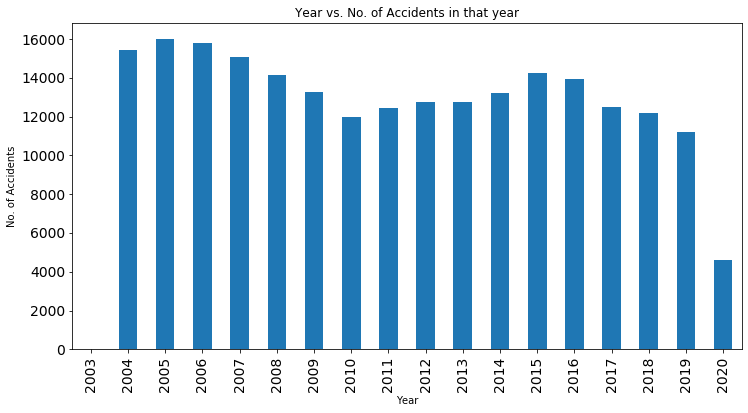

In [57]:
# Plotting The Number of Accidents on specific Years, Months, Week Day and Time of the Day
years.plot(kind='bar', figsize=(12,6),fontsize=14)
plt.title('Year vs. No. of Accidents in that year')
plt.xlabel('Year')
plt.ylabel('No. of Accidents')
plt.show()

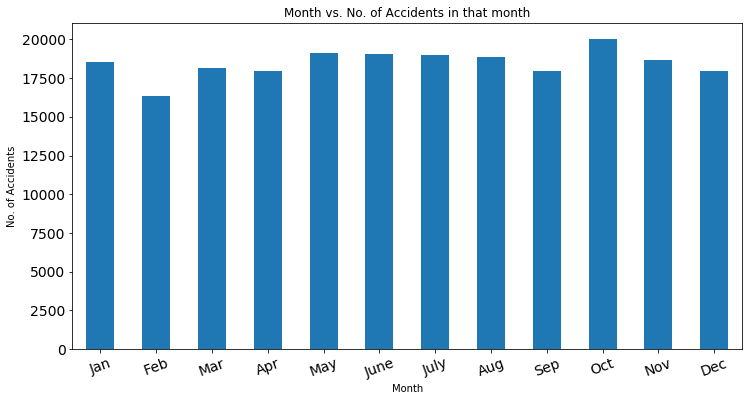

In [58]:
# Plotting The Number of Accidents on specific Years, Months, Week Day and Time of the Day
ax = months.plot(kind='bar', figsize=(12,6),fontsize=14)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'],rotation = 20)
plt.title('Month vs. No. of Accidents in that month')
plt.xlabel('Month')
plt.ylabel('No. of Accidents')
plt.show()

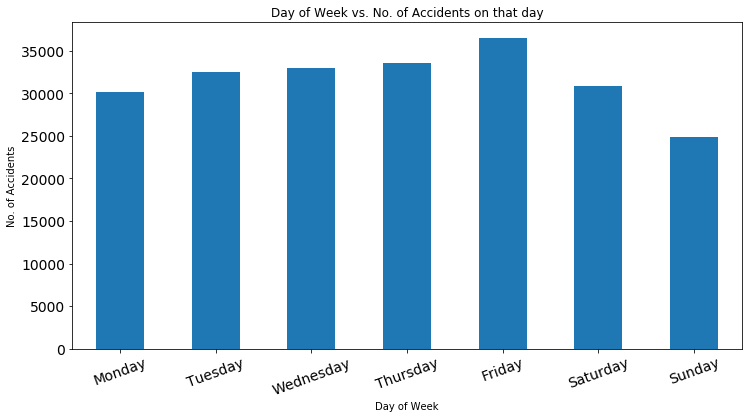

In [59]:
# Plotting The Number of Accidents on specific Years, Months, Week Day and Time of the Day
ax = days.plot(kind='bar', figsize=(12,6),fontsize=14)
ax.set_xticklabels(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),rotation = 20)
plt.title('Day of Week vs. No. of Accidents on that day')
plt.xlabel('Day of Week')
plt.ylabel('No. of Accidents')
plt.show()

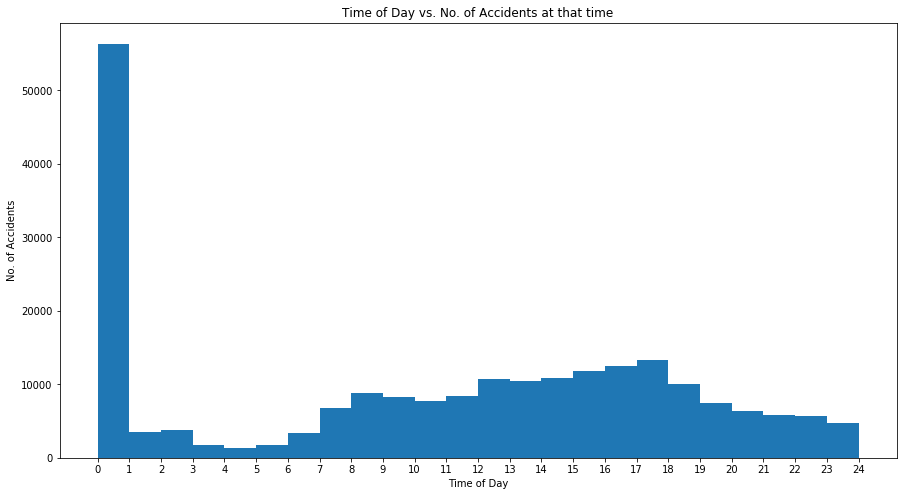

In [60]:
# Plotting The Number of Accidents on specific Years, Months, Week Day and Time of the Day
times = data.INCDTTM.dt.hour
plt.figure(figsize=(15,8))
plt.hist(times,bins=range(0,25))
plt.xticks(range(25))
plt.title('Time of Day vs. No. of Accidents at that time')
plt.xlabel('Time of Day')
plt.ylabel('No. of Accidents')
plt.show()

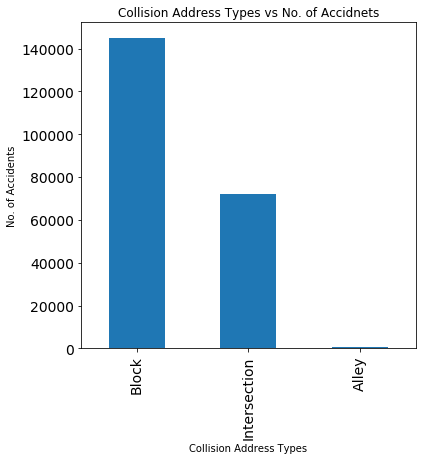

In [61]:
# Visualizing the no. of accidents at different address types
data.ADDRTYPE.value_counts().plot(kind='bar',figsize=(6,6),fontsize=14)
plt.title('Collision Address Types vs No. of Accidnets')
plt.xlabel('Collision Address Types')
plt.ylabel('No. of Accidents')
plt.show()

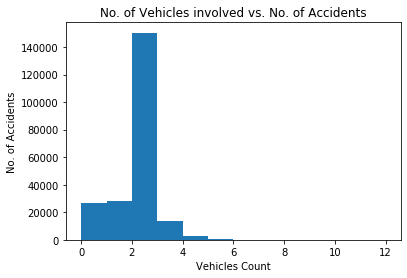

In [62]:
# Visualizing the no. of accidents and the number of vehicles involved
plt.hist(data['VEHCOUNT'],bins=range(0,13));
plt.title('No. of Vehicles involved vs. No. of Accidents')
plt.xlabel('Vehicles Count')
plt.ylabel('No. of Accidents')
plt.show()

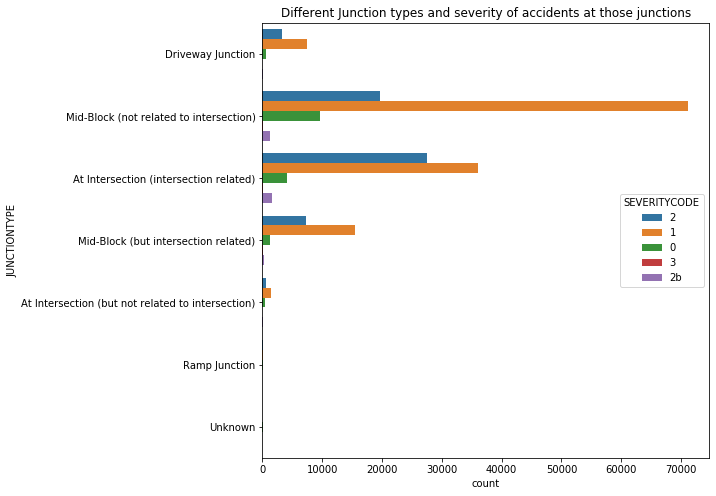

In [63]:
# Visualizing the severity of accidents at different junction types
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['JUNCTIONTYPE'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Different Junction types and severity of accidents at those junctions')
plt.show()

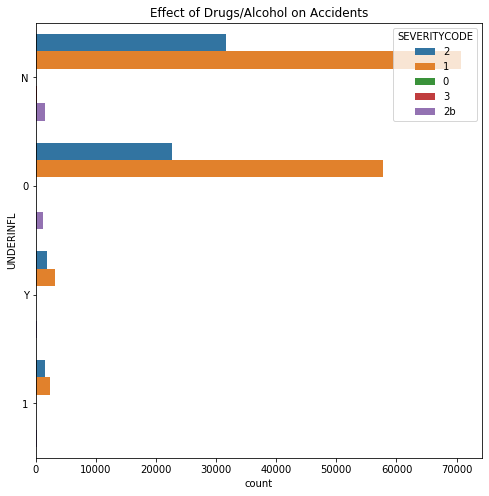

In [64]:
# Visualizing the effect of Drugs and Alcohol on the number of Accidents
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['UNDERINFL'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Drugs/Alcohol on Accidents')
plt.show()

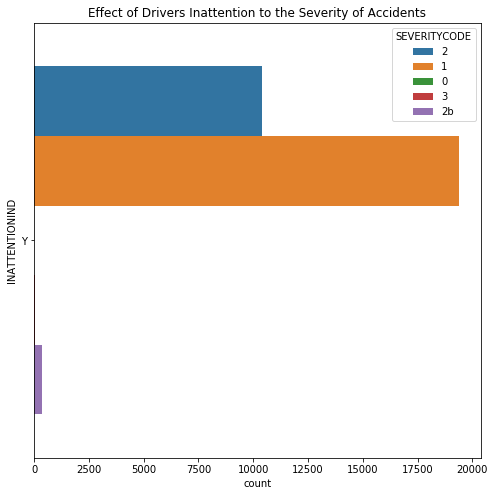

In [65]:
# Visualizing the effect of Drivers Inattention to the Severity of the Accident
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['INATTENTIONIND'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Drivers Inattention to the Severity of Accidents')
plt.show()

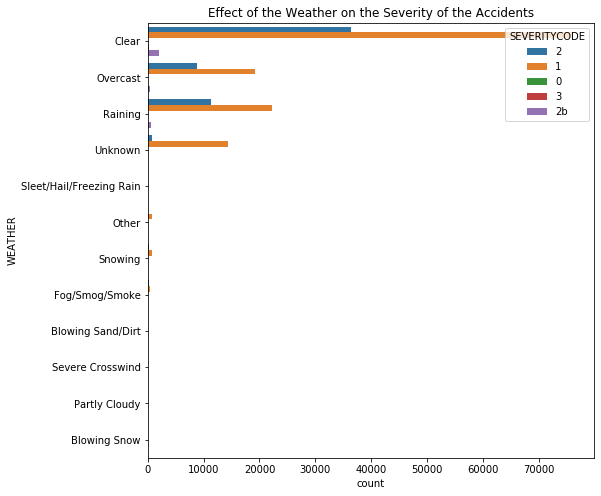

In [66]:
# Visualizing the effect of the Weather on the Severity of the Accident
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['WEATHER'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of the Weather on the Severity of the Accidents')
plt.show()

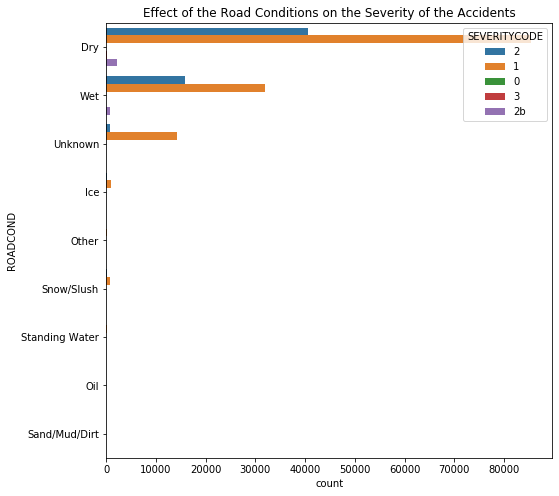

In [67]:
# Visualizing the effect of the Road Conditions on the Severity of the Accident
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['ROADCOND'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of the Road Conditions on the Severity of the Accidents')
plt.show()

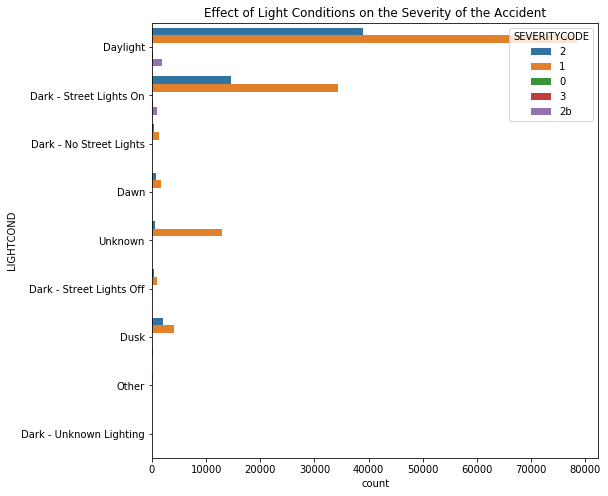

In [68]:
# Visualizing the effect of the Light Conditions on the Severity of the Accident
fig, ax = plt.subplots(figsize=(8,8))
sns.countplot(y=data['LIGHTCOND'], hue=data['SEVERITYCODE'],ax=ax).set(title = 'Effect of Light Conditions on the Severity of the Accident')
plt.show()

### 1.3 Data Preparation

In [69]:
# Finding All Null Data
print('Attribute Name \t\t No. of Null Values')
print("-"*43)
data.isnull().sum()

Attribute Name 		 No. of Null Values
-------------------------------------------


SEVERITYCODE           1
ADDRTYPE            3712
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INJURIES               0
FATALITIES             0
INCDTTM                0
JUNCTIONTYPE       11974
INATTENTIONIND    191337
UNDERINFL          26293
WEATHER            26503
ROADCOND           26422
LIGHTCOND          26592
SPEEDING          211596
HITPARKEDCAR           0
dtype: int64

In [70]:
# Understanding the unique values of each variable / attribute
for column in data.columns:
    print('Column Name :\t',column)
    print(data[column].value_counts())
    print('-'*30)

Column Name :	 SEVERITYCODE
1     137671
2      58783
0      21615
2b      3105
3        350
Name: SEVERITYCODE, dtype: int64
------------------------------
Column Name :	 ADDRTYPE
Block           144999
Intersection     71936
Alley              878
Name: ADDRTYPE, dtype: int64
------------------------------
Column Name :	 PERSONCOUNT
2     119078
3      36555
0      25008
4      15017
1      13938
5       6794
6       2796
7       1180
8        547
9        227
10       133
11        59
12        35
13        22
14        22
15        11
17        11
16         8
44         6
20         6
25         6
18         6
19         6
22         5
29         4
26         4
23         3
32         3
47         3
27         3
28         3
37         3
34         3
21         2
36         2
31         2
30         2
24         2
35         1
81         1
39         1
41         1
43         1
48         1
53         1
54         1
57         1
93         1
Name: PERSONCOUNT, dtype: int64
-------

In [71]:
# Data Cleaning - Removing Records that have an "Unknown" in any of the data attributes.
print("Shape before dropping rows : ",data.shape)
drop_index = ((data.INCDTTM=='Unknown') | (data.WEATHER=='Unknown') | (data.ROADCOND=='Unknown')|(data.LIGHTCOND =='Unknown')|(data.JUNCTIONTYPE =='Unknown'))
data.drop(data[drop_index].index, inplace=True)
print("Shape after dropping rows : ",data.shape)

Shape before dropping rows :  (221525, 17)
Shape after dropping rows :  (202498, 17)


C:\Users\Jack\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
# Data Cleaning - Sorting out the inconsitency in the data values.
data['UNDERINFL'].replace('Y',1,inplace=True)
data['UNDERINFL'].replace('N',0,inplace=True)
data['UNDERINFL'] = pd.to_numeric(data['UNDERINFL'])

data['LIGHTCOND'].replace('Dark - Street Lights Off', 'Dark - No Street Lights', inplace=True)
data['LIGHTCOND'].replace('Dark - Unknown Lighting', 'Dark - No Street Lights', inplace=True)

data['INATTENTIONIND'].replace('Y',1,inplace=True)

C:\Users\Jack\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Jack\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [73]:
# Data Cleaning - Filling Missing Data of certain attributes 
data['UNDERINFL'].fillna(0, inplace=True)
data['INATTENTIONIND'].fillna(0,inplace = True)
data['SPEEDING'].fillna(0,inplace = True)

# Data Transformation - Replace Y values in with 1 to be consistent with the missing data that was cosidered as non-speeding and filled with value of 0
data['SPEEDING'].replace("Y",1,inplace=True)

# Data Cleaning - Droping the rest of the records with missing data.
# Wiping the data
# data.shape
data.dropna(inplace=True)
data.shape

C:\Users\Jack\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\Jack\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


(173118, 17)

In [74]:
# Data Cleaning - Checking for any non-value data
data.isna().sum()

SEVERITYCODE      0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INJURIES          0
FATALITIES        0
INCDTTM           0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

In [75]:
# Data Cleaning - Checking for any further missing values
columns = data.columns.to_list()
for column in columns:
    null_values = data[column].isnull().sum()
    print("Missing values in "+column+": "+str(null_values))

Missing values in SEVERITYCODE: 0
Missing values in ADDRTYPE: 0
Missing values in PERSONCOUNT: 0
Missing values in PEDCOUNT: 0
Missing values in PEDCYLCOUNT: 0
Missing values in VEHCOUNT: 0
Missing values in INJURIES: 0
Missing values in FATALITIES: 0
Missing values in INCDTTM: 0
Missing values in JUNCTIONTYPE: 0
Missing values in INATTENTIONIND: 0
Missing values in UNDERINFL: 0
Missing values in WEATHER: 0
Missing values in ROADCOND: 0
Missing values in LIGHTCOND: 0
Missing values in SPEEDING: 0
Missing values in HITPARKEDCAR: 0


In [76]:
# Data Transformation of SEVERITYCODE
# Checking count and value type of the attribute
data['SEVERITYCODE'].value_counts()

1     113626
2      56178
2b      2977
3        335
0          2
Name: SEVERITYCODE, dtype: int64

In [77]:
# Data Transformation of SEVERITYCODE - Binary Encoding
# There are 2 records with Unknow serverity, Drop them
data = data[data.SEVERITYCODE != '0']

# Combine injuries, serious injuries and fatality to injury as serious and fatality numbers are negligible.
# We end up with two categories Accident with Property Damage only with value 1 and Accident with Injuries with value 2
data['SEVERITYCODE'].replace('3',2,inplace=True)
data['SEVERITYCODE'].replace('2b',2,inplace=True)
#Converting the data to Numeric
data['SEVERITYCODE'] = pd.to_numeric(data['SEVERITYCODE'])
data['SEVERITYCODE'].value_counts()

data['HITPARKEDCAR'].replace('N',0,inplace=True)
data['HITPARKEDCAR'].replace('Y',1,inplace=True)
#Converting the data to Numeric
data['HITPARKEDCAR'] = pd.to_numeric(data['HITPARKEDCAR'])
data['HITPARKEDCAR'].value_counts()

0    168392
1      4724
Name: HITPARKEDCAR, dtype: int64

In [78]:
# Data Balancing - As seen the SEVERITYCODE data is not balanced. The number of accidents with SEVERITYCODE=1 are downsampled.
#Balancing the data variable.
from sklearn.utils import resample
data_majority = data[data.SEVERITYCODE==1]
data_minority = data[data.SEVERITYCODE==2]

#Downsample majority class
data_majority_downsampled = resample(data_majority,
                                        replace=False,
                                        n_samples=58188,
                                        random_state=123)
# Combine minority class with downsampled majority class
data_balanced = pd.concat([data_majority_downsampled, data_minority])

# Display new class counts
data_balanced.SEVERITYCODE.value_counts()

2    59490
1    58188
Name: SEVERITYCODE, dtype: int64

In [79]:
# Data Transformation - One Hot Enconding
feature = data_balanced[['INATTENTIONIND','UNDERINFL','SPEEDING', 'HITPARKEDCAR']]
feature = pd.concat([feature,pd.get_dummies(data_balanced['ADDRTYPE'])], axis=1)
feature = pd.concat([feature,pd.get_dummies(data_balanced['WEATHER'])], axis=1)
feature = pd.concat([feature,pd.get_dummies(data_balanced['ROADCOND'])], axis=1)
feature = pd.concat([feature,pd.get_dummies(data_balanced['LIGHTCOND'])], axis=1)
feature = pd.concat([feature,pd.get_dummies(data_balanced['JUNCTIONTYPE'])], axis=1)
feature.head()

,INATTENTIONIND,UNDERINFL,SPEEDING,HITPARKEDCAR,Alley,Block,Intersection,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,...,Dawn,Daylight,Dusk,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction
179493,0.0,0.0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
194462,0.0,0.0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,0,0
40976,0.0,0.0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
89400,0.0,0.0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
89737,1.0,0.0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [80]:
# Feature Selection
x = feature
y = data_balanced['SEVERITYCODE'].values

In [81]:
# Data Normalization
x= preprocessing.StandardScaler().fit(x).transform(x)
x[0:5]

array([[-0.45185726, -0.24681416, -0.24839909, -0.15213351, -0.03113976,
        -1.23103804,  1.23353127, -0.01542706,  0.75044154, -0.05577934,
        -0.03747132, -0.43121616, -0.00714067, -0.48999947, -0.01129082,
        -0.02558821, -0.06564957,  0.6316223 , -0.07691058, -0.01797274,
        -0.02525349, -0.01797274, -0.06584513, -0.02457042, -0.61293653,
        -0.11954346,  1.63663895, -0.12161085, -1.408984  , -0.18607209,
        -0.031816  , -0.1040757 ,  1.26202683, -0.24816764, -0.3754532 ,
        -0.85288267, -0.03044857],
       [-0.45185726, -0.24681416, -0.24839909, -0.15213351, -0.03113976,
        -1.23103804,  1.23353127, -0.01542706,  0.75044154, -0.05577934,
        -0.03747132, -0.43121616, -0.00714067, -0.48999947, -0.01129082,
        -0.02558821, -0.06564957,  0.6316223 , -0.07691058, -0.01797274,
        -0.02525349, -0.01797274, -0.06584513, -0.02457042, -0.61293653,
        -0.11954346, -0.61100831, -0.12161085,  0.70973127, -0.18607209,
        -0.03181

### 1.4 Data Modeling

In [82]:
# Train/Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
print('Test set:', x_test.shape,  y_test.shape)

Test set: (23536, 37) (23536,)


#### 1.4.1 K Nearest Neighbor(KNN)

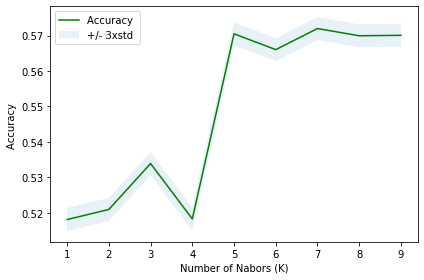

The best accuracy was with 0.571974847042828 with k= 7


In [83]:
# Finding the best k value
from sklearn.neighbors import KNeighborsClassifier
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [84]:
# Model Training and Fitting
from sklearn.neighbors import KNeighborsClassifier
k = mean_acc.argmax()+1
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)

In [85]:
# Model Prediction
yhat = neigh.predict(x_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.581897559006607
Test set Accuracy:  0.571974847042828


#### 1.4.2 Decision Trees

In [86]:
# Model Training and Fitting
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
# Model Prediction
predTree = tree.predict(x_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.5985723997280762


#### 1.4.3 Support Vector Machine

In [88]:
# Model Training and Fitting
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [89]:
# Model Fitting
yhat = clf.predict(x_test)
print("SVM's Accuracy: ", metrics.accuracy_score(y_test, yhat))

SVM's Accuracy:  0.5998470428280082


#### 1.4.4 Logistic Regression

In [90]:
# Model Training and Fitting
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
# Model Prediction
yhat = LR.predict(x_test)
yhat_prob = LR.predict_proba(x_test)

array([2, 1, 2, ..., 2, 2, 1], dtype=int64)

### 1.5 Model Evaluation

In [97]:
# Import the metrics functions in scikit-learn
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# Prediction by k-Nearest Neighbors
yhat = neigh.predict(x)
print('jaccard similarity score for KNN algorithm: ', format(jaccard_similarity_score(y, yhat), '.2f'))
print('F1-score: ', format(f1_score(y, yhat, average='weighted'), '.2f' )) 

# Prediction by Decision Trees
yhat_2 = tree.predict(x)
print('Jaccard similarity score with Decision tree: ', format(jaccard_similarity_score(y, yhat_2), '.2f'))
print('F1-score: ', format(f1_score(y, yhat_2, average='weighted'), '.2f'))

# Prediction by Support Vector Machine
yhat_3 = clf.predict(x)
print('Jaccard similarity score with SVM: ', format(jaccard_similarity_score(y, yhat_3), '.2f'))
print('F1-score: ', format(f1_score(y, yhat_3, average='weighted'), '.2f'))

# Prediction by logistic Regression
yhat_4 = LR.predict(x)
yhat_4_proba = LR.predict_proba(x)
print('Jaccard similarity score with Logistic Regression: ', format(jaccard_similarity_score(y, yhat_4), '.2f'))
print('F1-score: ', format(f1_score(y, yhat_4, average='weighted'), '.2f'))
print('LogLoss: ', format(log_loss(y, yhat_4_proba), '.2f'))

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


jaccard similarity score for KNN algorithm:  0.58
F1-score:  0.58
Jaccard similarity score with Decision tree:  0.60
F1-score:  0.60
Jaccard similarity score with SVM:  0.61
F1-score:  0.61
Jaccard similarity score with Logistic Regression:  0.60
F1-score:  0.60
LogLoss:  0.67


C:\Users\Jack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\Jack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [98]:
# Displaying the accuracy metrics result TABLE
KNN_J_I=round(jaccard_similarity_score(y, yhat),2)
KNN_F1_S=round(f1_score(y, yhat, average='weighted'),2)
DT_J_I=round(jaccard_similarity_score(y, yhat_2),2)
DT_F1_S=round(f1_score(y, yhat_2, average='weighted'),2)
SVM_J_I=round(jaccard_similarity_score(y, yhat_3),2)
SVM_F1_S=round(f1_score(y, yhat_3, average='weighted'),2)
LR_J_I=round(jaccard_similarity_score(y, yhat_4),2)
LR_F1_S=round(f1_score(y, yhat_4, average='weighted'),2)
LR_LL=round(log_loss(y, yhat_4_proba),2)


KPI = [ (KNN_J_I , KNN_F1_S , 'NA') ,
        (DT_J_I, DT_F1_S, 'NA') ,
        (SVM_J_I, SVM_F1_S, 'NA') ,
           (LR_J_I, LR_F1_S, LR_LL) ]

columns = ['Jaccard', 'F1-score', 'LogLoss']
index=['KNN', 'Decision Tree', 'SVM' , 'Logistic Regression']
#Report = pd.DataFrame(KPI, columns = ['Algorithm' , 'Jaccard', 'F1-score'], index=['KNN', 'Decision Tree', 'SVM' , 'Logistic Regression'])

#Report = pd.DataFrame(KPI, columns, index)
#Report.index.name = 'Algorithm'
#Report

#Report = pd.DataFrame(KPI, columns = ['Jaccard', 'F1-score', 'LogLoss'], index=['Algorithm' , 'KNN', 'Decision Tree', 'SVM' , 'Logistic Regression'])

Report = pd.DataFrame(KPI, columns = ['Jaccard', 'F1-score', 'LogLoss'], index=['KNN', 'Decision Tree', 'SVM' , 'Logistic Regression'])
Report.index.name = 'Algorithm'
Report

C:\Users\Jack\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.58,0.58,NA
Decision Tree,0.60,0.60,NA
SVM,0.61,0.61,NA
Logistic Regression,0.60,0.60,0.67
